<a href="https://www.kaggle.com/code/carloszoom3000/iia-tp-3-carlos-villalobos?scriptVersionId=173064535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
dataset = pd.read_csv("/kaggle/input/spambase/spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


In [3]:
#obteniendo las mas usadas
column_sum = dataset.groupby(by="spam", as_index=False).sum()

In [4]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

In [5]:
#datasets de entrenamiento y evaluación
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

In [6]:
#scaler para aplicar la regresion logistica
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

**1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?**

In [7]:
#Suma de las palabras en correos con SPAM y sin SPAM
spam_word_sum = dataset.loc[dataset['spam'] == 1].drop(columns='spam').sum()
non_spam_word_sum = dataset.loc[dataset['spam'] == 0].drop(columns='spam').sum()

#Se ordenan las palabras por frecuencia
top_spam_words = spam_word_sum.sort_values(ascending=False).head(10)
top_non_spam_words = non_spam_word_sum.sort_values(ascending=False).head(10)

print("Top 10 palabras más encontradas en correos con SPAM:")
print(top_spam_words)

print("\nTop 10 palabras más encontradas en correos No SPAM:")
print(top_non_spam_words)

#Estas seon las palabras en común
common_words = set(top_spam_words.index) & set(top_non_spam_words.index)
print("\nPalabras en común:")
print(common_words)

Top 10 palabras más encontradas en correos con SPAM:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
dtype: int64

Top 10 palabras más encontradas en correos No SPAM:
word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
dtype: int64

Palabras en común:
{'word_freq_will', 'word_freq_you', 'word_freq_your'}


Llama la atención que existan palabras en común SPAM y no SPAM.
Estos podrían ser datos confusos.

**2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).**

In [8]:
#Se divide el conjunto de datos en entrenamiento y prueba (70% y 30% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Se imprimen las formas de los conjuntos de datos de entrenamiento y prueba para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (3220, 54)
Forma de X_test: (1381, 54)
Forma de y_train: (3220,)
Forma de y_test: (1381,)


**3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.**

In [9]:
#Aquí hacemos uso de MultinomialNB
#Inicializamos el clasificador Naive Bayes
naive_bayes_classifier = MultinomialNB()

#Entrenamos el clasificador con el conjunto de entrenamiento
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

**4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).**

In [10]:
#Usamos LogisticRegression y MinMaxScaler
#Inicializamos el scaler
scaler = MinMaxScaler()

#Normalizamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

#Inicializamos el clasificador de regresión logística
logistic_regression_classifier = LogisticRegression()

#Entrenamos/ajustamos el clasificador con el conjunto de entrenamiento normalizado
logistic_regression_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

**5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?**

In [11]:
#Para el clasificador de Bayes ingenuo
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)

#Para el clasificador de regresión logística
X_test_scaled = scaler.transform(X_test)
logistic_regression_predictions = logistic_regression_classifier.predict(X_test_scaled)
logistic_regression_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)

print("Esta es la matriz de confusión para el modelo de Naive Bayes:")
print(naive_bayes_conf_matrix)

print("\n")

print("Esta es la matriz de confusión para el modelo de regresión logística:")
print(logistic_regression_conf_matrix)

Esta es la matriz de confusión para el modelo de Naive Bayes:
[[650 154]
 [ 22 555]]


Esta es la matriz de confusión para el modelo de regresión logística:
[[769  35]
 [117 460]]


Los errores más comunes son de falsos positivos y falsos negativos.
Los falsos positivos marcan correos normales como spam.
Los falsos negativos, pueden ser más alarmantes dado que permiten el ingreso de correos spam a la bandeja de entrada. Esto además de llenar la bandeja podría ser inseguro.
Por esto, los falsos negativos son más importantes para este problema.

**6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.**

In [12]:
#Usamos precision_score, recall_score
#Precisión y recuperación para el clasificador Naive Bayes
naive_bayes_precision = precision_score(y_test, naive_bayes_predictions)
naive_bayes_recall = recall_score(y_test, naive_bayes_predictions)

#Precisión y recuperación para el clasificador de regresión logística
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)

print("Precisión del clasificador Naive Bayes:", naive_bayes_precision)
print("Recuperación del clasificador Naive Bayes:", naive_bayes_recall)

print("\n")

print("Precisión del clasificador de regresión logística:", logistic_regression_precision)
print("Recuperación del clasificador de regresión logística:", logistic_regression_recall)

Precisión del clasificador Naive Bayes: 0.7827926657263752
Recuperación del clasificador Naive Bayes: 0.9618717504332756


Precisión del clasificador de regresión logística: 0.9292929292929293
Recuperación del clasificador de regresión logística: 0.7972270363951474


Enendamos primero que la precisión mide la porción de predicciones positivas correcta entre todas las predicciones positivas realizadas por el modelo.
Dado que se pretende evitar que correos spam se filtren como legítimos o esperados, una alta precisión en el modelo sería mas conservador en la clasificación, y tendría menos falsos positivos.

La recuperación, mide la proporción de ejemplos positivos que fueron correctamente identificados por el modelo. Así, un modelo con alta recuperación tiene pocos falsos negativos. Detectanto spam, nos interesa capturar el mayor número de posibles correos de esta clase.
En una alta recuperación también se pueden filtrar correos legítimos como spam. Lo cual arrojaría mas falsos positivos.

Se necesita entonces elegir un balance entre la precisión y la recuperación, para elegir nuestro mejor modelo.
Si se prioriza evitar que se filtren correos spam como legítimos, entonces elegimos una alta precisión.
Si se desea detectar la mayoría de correos spam, elegiríamos un modelo con alta recuperación.

**7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.**

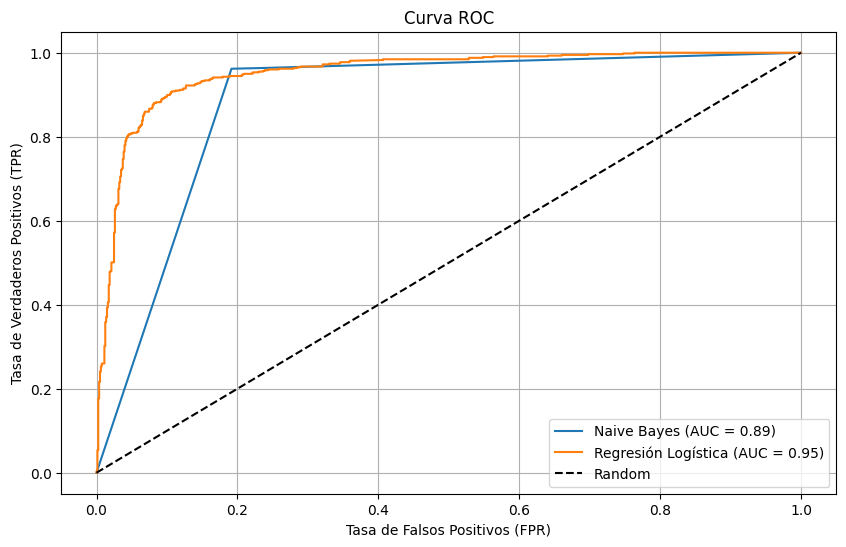

In [13]:
#Aquí usamos roc_curve y roc_auc_score
#Calculamos las probabilidades de predicción para ambos modelos
nb_probabilities = naive_bayes_classifier.predict_proba(X_test)[:, 1]
lr_probabilities = logistic_regression_classifier.predict_proba(X_test_scaled)[:, 1]

#Calculamos la curva ROC y el AUC para Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probabilities)
nb_auc = roc_auc_score(y_test, nb_probabilities)

#Calculamos la curva ROC y el AUC para Regresión Logística
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)
lr_auc = roc_auc_score(y_test, lr_probabilities)

#Este sería el grafico de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(lr_fpr, lr_tpr, label='Regresión Logística (AUC = {:.2f})'.format(lr_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()